In [8]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [5]:
housing = pd.read_csv('data/houseprice_clean.csv')
housing.shape

(2580, 80)

In [57]:
housing.head()

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,856,30,58.800593,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,3,2010,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Normal,126000
1,1049,120,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,2,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,139500
2,1001,30,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,11,2007,C (all),Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Detchd,Unf,TA,Po,N,None,None,None,WD,Normal,124900
3,1039,70,80.000000,8146,4,8,1900,2003,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,1.0,281.0,0,0,168,0,111,0,0,5,2009,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,N,None,None,None,WD,Normal,114000
4,1665,60,70.000000,8400,8,6,2001,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,2.0,528.0,0,45,0,0,0,0,0,11,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,227000


In [58]:
housing.dtypes

GrLivArea          int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
MSZoning          object
Street            object
Alley             object
LotShape          object


In [6]:
price = housing['SalePrice']
features = housing.drop(["SalePrice"], axis=1)

In [ ]:
# feature engineering

# how to approach this - 
# do I want to make some variables binary?
# do I wnat to combine measurements (sqft)?

In [48]:
features['YearBuilt'].describe() # 1872-2010
features['YearRemodAdd'].describe()

count    2580.000000
mean     1983.751938
std        20.490242
min      1950.000000
25%      1965.000000
50%      1992.000000
75%      2003.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

<Axes: >

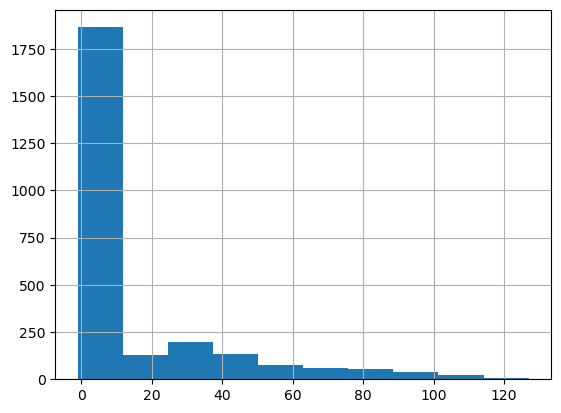

In [4]:
# most homes do not have a remodel (remodel year is the same as original year built)
(features['YearRemodAdd'] - features['YearBuilt']).describe()
(features['YearRemodAdd'] - features['YearBuilt']).hist()

In [82]:
# for most homes, total ground living area is sum of 1st + 2nd floor
features[['1stFlrSF', '2ndFlrSF', 'GrLivArea']]

sf = features[features['GrLivArea'] != (features['1stFlrSF'] + features['2ndFlrSF'])]
sf['TotalSF'] = sf['1stFlrSF'] + sf['2ndFlrSF'] + sf['LowQualFinSF']
sf[['GrLivArea', 'TotalSF']]

features[features['LowQualFinSF'] != 0].shape
sf.shape

# if home has low quality finished sq ft, this is included in living area

/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_19702/3989866467.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sf['TotalSF'] = sf['1stFlrSF'] + sf['2ndFlrSF'] + sf['LowQualFinSF']


(33, 80)

In [39]:
features['WoodDeckSF'].describe()
features['OpenPorchSF'].describe()
features['EnclosedPorch'].describe()
features['3SsnPorch'].describe()
features['ScreenPorch'].describe()

count    2580.000000
mean       16.200388
std        56.824783
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       576.000000
Name: ScreenPorch, dtype: float64

In [46]:
features['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

In [40]:
features['PoolArea'].describe()

count    2580.000000
mean        1.662016
std        30.339396
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64

In [42]:
features['PoolQC'].value_counts()

None    2571
TA         3
Ex         2
Gd         2
Fa         2
Name: PoolQC, dtype: int64

In [43]:
features['MiscFeature'].value_counts()

None    2483
Shed      88
Gar2       5
Othr       3
TenC       1
Name: MiscFeature, dtype: int64

In [44]:
features['SaleType'].value_counts()

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

In [45]:
features['SaleCondition'].value_counts()

Normal     2414
Partial      82
Abnorml      61
Family       17
Alloca        4
AdjLand       2
Name: SaleCondition, dtype: int64

<Axes: >

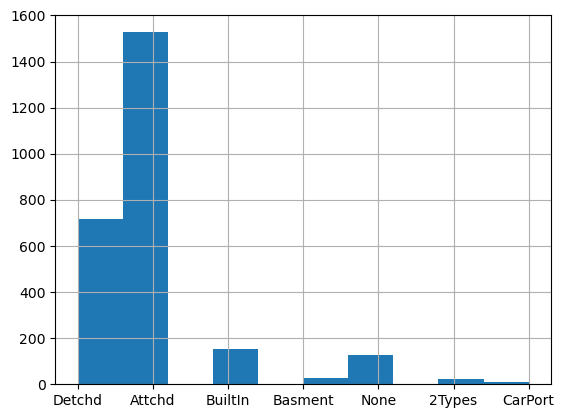

In [29]:
features['GarageType'].hist()

<Axes: >

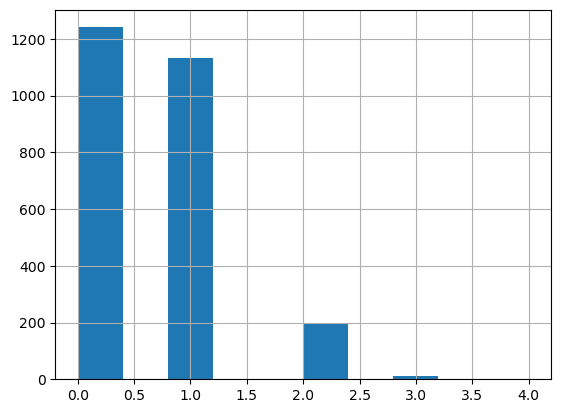

In [26]:
features['Fireplaces'].hist()

In [28]:
features['Fireplace_bool'] = if(housing['Fireplace'] == 0)

SyntaxError: invalid syntax (3149206144.py, line 1)

In [ ]:
features.drop(['Fireplaces'])

In [6]:
housing.filter(regex='Garage')

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
GrLivArea,,,,,,,
856,1939.0,2.0,399.0,Detchd,Unf,TA,TA
1049,1984.0,1.0,266.0,Attchd,Fin,TA,TA
1001,1930.0,1.0,216.0,Detchd,Unf,TA,Po
1039,1940.0,1.0,281.0,Detchd,Unf,TA,TA
1665,2001.0,2.0,528.0,Attchd,Fin,TA,TA
...,...,...,...,...,...,...,...
952,1916.0,1.0,192.0,Detchd,Unf,Fa,Po
1733,1955.0,2.0,452.0,Attchd,Unf,TA,TA
2002,1949.0,3.0,871.0,2Types,Unf,TA,TA


In [8]:
housing['GarageCars'].describe()

count    2580.000000
mean        1.747577
std         0.738535
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [13]:
housing[housing['GarageType'] == 'None'].shape

(127, 79)

<Axes: >

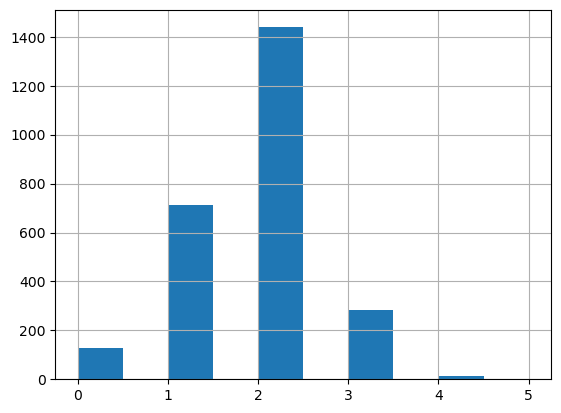

In [10]:
housing['GarageCars'].hist()

<Axes: >

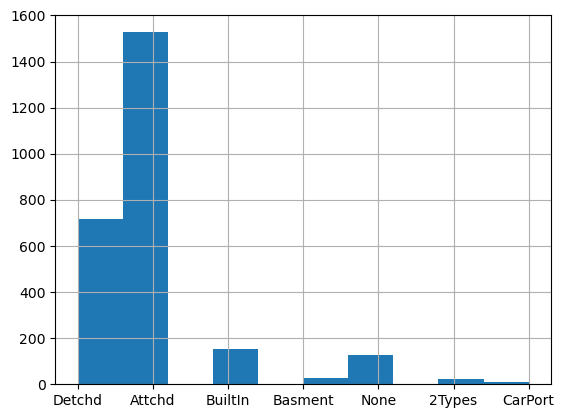

In [9]:
housing['GarageType'].hist()

In [ ]:
housing.filter(regex='Bsmt')

<Axes: >

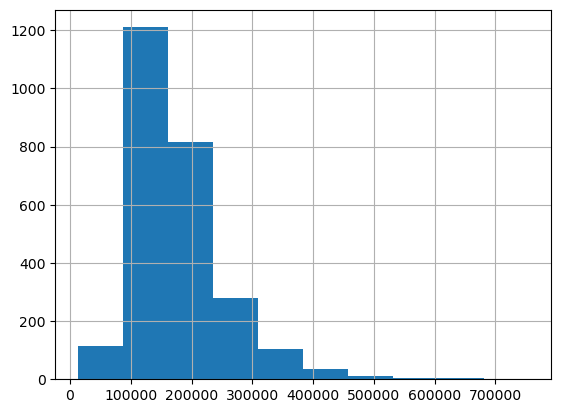

In [4]:
# sale price is skewed left
housing.SalePrice.hist()

<Axes: >

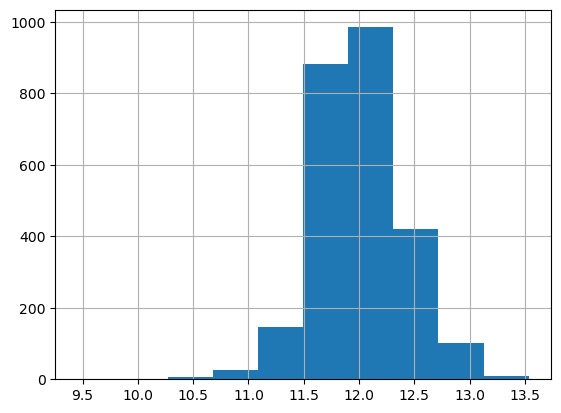

In [5]:
# log transformation might be more useful
np.log(housing.SalePrice).hist()

In [ ]:
# correlation

In [14]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
GrLivArea,1.000000,0.070785,0.215411,0.260322,0.559897,-0.105670,0.228400,0.306035,0.385898,0.165303,-0.020907,0.245993,0.410370,0.539135,0.665001,0.088931,0.043364,-0.053499,0.643937,0.445513,0.538022,0.129797,0.807445,0.457926,0.264469,0.494964,0.477107,0.247716,0.321777,0.000196,0.008714,0.097835,0.057935,-0.003940,0.038389,-0.008260,0.719981
MSSubClass,0.070785,1.000000,-0.213735,-0.198040,0.056468,-0.075542,0.053852,0.056756,0.018243,-0.073712,-0.073975,-0.112772,-0.220789,-0.255798,0.306929,0.013473,-0.001576,-0.010403,0.144475,0.181780,-0.023680,0.251357,0.032047,-0.047790,0.062549,-0.031962,-0.091176,-0.017656,-0.007649,-0.028535,-0.041798,-0.055099,-0.013431,-0.027226,0.007252,-0.025351,-0.084587
LotFrontage,0.215411,-0.213735,1.000000,0.757342,0.062851,-0.020534,0.020142,0.003578,0.120234,0.132843,0.044623,0.039035,0.194325,0.274791,0.005596,-0.009520,0.076655,0.042090,0.109946,0.002901,0.144210,-0.003635,0.184040,0.214902,-0.001754,0.162424,0.187852,0.127811,0.077807,0.016673,0.032846,0.024024,0.033761,0.042912,-0.002224,-0.007022,0.208847
LotArea,0.260322,-0.198040,0.757342,1.000000,0.080607,-0.032693,0.012397,0.010293,0.103514,0.163632,0.082394,0.019984,0.222261,0.313086,0.022434,-0.000334,0.116965,0.027077,0.124352,0.026727,0.140430,-0.014575,0.204545,0.245148,0.004232,0.175733,0.199241,0.155687,0.084963,0.017694,0.017721,0.053820,0.052636,0.040220,0.010203,-0.017319,0.274443
OverallQual,0.559897,0.056468,0.062851,0.080607,1.000000,-0.095927,0.574400,0.546297,0.401996,0.274344,-0.030192,0.256243,0.528648,0.454481,0.246885,-0.044359,0.173935,-0.050320,0.508255,0.271455,0.067466,-0.153691,0.360675,0.387777,0.561841,0.580957,0.538121,0.250181,0.286861,-0.134291,0.014226,0.049277,-0.002484,-0.025825,0.016780,0.005668,0.790501
OverallCond,-0.105670,-0.075542,-0.020534,-0.032693,-0.095927,1.000000,-0.397274,0.065100,-0.142250,-0.064808,0.029835,-0.124528,-0.180388,-0.156592,0.015073,0.019018,-0.058672,0.084865,-0.210226,-0.096052,0.004108,-0.075642,-0.072482,-0.046570,-0.314076,-0.195775,-0.168235,0.014161,-0.067437,0.085910,0.041904,0.050417,-0.021193,0.046015,0.012211,0.017632,-0.101091
YearBuilt,0.228400,0.053852,0.020142,0.012397,0.574400,-0.397274,1.000000,0.572276,0.302447,0.303842,-0.009709,0.092532,0.401240,0.294691,0.015754,-0.132086,0.229861,-0.028676,0.450065,0.272979,-0.048768,-0.136983,0.095450,0.167188,0.850812,0.519239,0.462947,0.227289,0.179654,-0.360933,0.009513,-0.042655,0.004925,-0.027354,-0.007534,0.015349,0.544370
YearRemodAdd,0.306035,0.056756,0.003578,0.010293,0.546297,0.065100,0.572276,1.000000,0.171725,0.157073,-0.050979,0.131349,0.273058,0.217709,0.166301,-0.063714,0.147601,-0.048489,0.434877,0.209656,-0.016713,-0.145110,0.185204,0.123843,0.591371,0.398071,0.348409,0.218273,0.226677,-0.205205,0.028543,-0.043130,-0.018693,-0.016669,0.002476,0.064046,0.514309
MasVnrArea,0.385898,0.018243,0.120234,0.103514,0.401996,-0.142250,0.302447,0.171725,1.000000,0.276034,-0.008873,0.080349,0.360725,0.361919,0.129439,-0.053804,0.128601,0.003325,0.253571,0.197442,0.104035,-0.039454,0.261412,0.246354,0.255558,0.346076,0.347303,0.149983,0.119097,-0.102313,0.011964,0.064982,-0.003637,-0.021630,-0.007766,-0.020050,0.498432
BsmtFinSF1,0.165303,-0.073712,0.132843,0.163632,0.274344,-0.064808,0.303842,0.157073,0.276034,1.000000,-0.058776,-0.480169,0.512920,0.426904,-0.180589,-0.070721,0.632841,0.067588,0.084889,-0.023515,-0.106045,-0.105758,0.017167,0.278941,0.235899,0.262063,0.298559,0.217652,0.100634,-0.107225,0.044379,0.102201,0.017803,0.014607,-0.003553,0.014155,0.461070


In [15]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790501
GrLivArea        0.719981
TotalBsmtSF      0.652494
1stFlrSF         0.642613
GarageCars       0.638785
GarageArea       0.634976
YearBuilt        0.544370
FullBath         0.534982
GarageYrBlt      0.532087
YearRemodAdd     0.514309
MasVnrArea       0.498432
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.461070
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.290755
HalfBath         0.285875
LotArea          0.274443
2ndFlrSF         0.263144
LotFrontage      0.208847
BsmtUnfSF        0.168060
BedroomAbvGr     0.151806
ScreenPorch      0.121463
3SsnPorch        0.031260
PoolArea         0.030844
BsmtFinSF2       0.022668
MoSold           0.012591
YrSold          -0.001376
MiscVal         -0.018877
LowQualFinSF    -0.030835
BsmtHalfBath    -0.033786
MSSubClass      -0.084587
OverallCond     -0.101091
KitchenAbvGr    -0.113977
EnclosedPorch   -0.123235
Name: SalePrice, dtype: float64

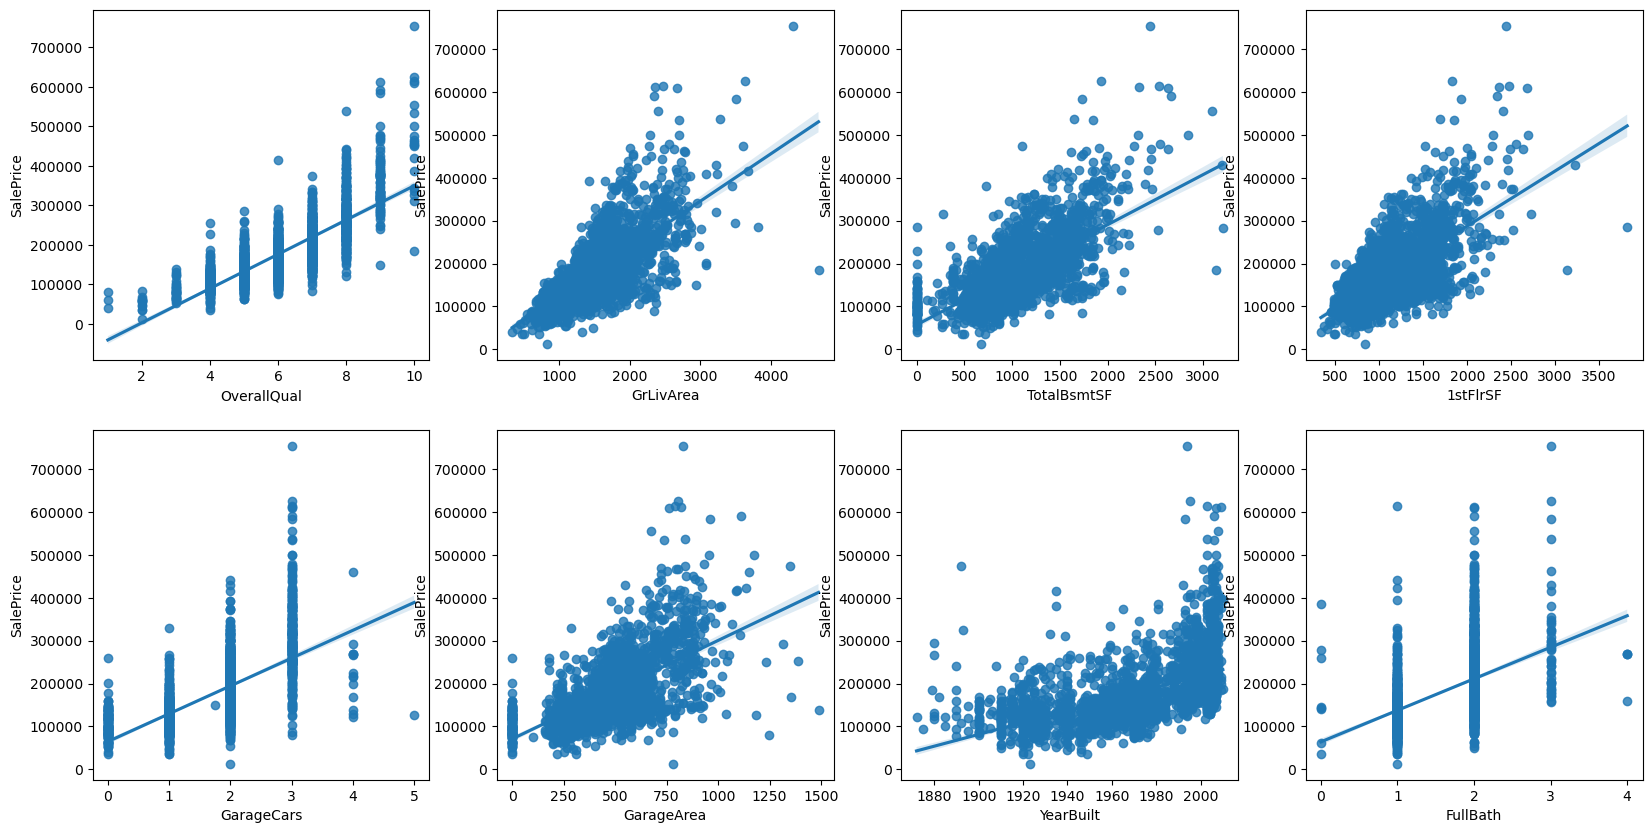

In [22]:
# scatterplots for 8 variables with highest correlation
fig, ax = plt.subplots(2, 4, figsize=(20,10))

sns.regplot(x=housing['OverallQual'], y=housing['SalePrice'], ax=ax[0, 0])
sns.regplot(x=housing['GrLivArea'], y=housing['SalePrice'], ax=ax[0, 1])
sns.regplot(x=housing['TotalBsmtSF'], y=housing['SalePrice'], ax=ax[0, 2])
sns.regplot(x=housing['1stFlrSF'], y=housing['SalePrice'], ax=ax[0, 3])
sns.regplot(x=housing['GarageCars'], y=housing['SalePrice'], ax=ax[1, 0])
sns.regplot(x=housing['GarageArea'], y=housing['SalePrice'], ax=ax[1, 1])
sns.regplot(x=housing['YearBuilt'], y=housing['SalePrice'], ax=ax[1, 2])
sns.regplot(x=housing['FullBath'], y=housing['SalePrice'], ax=ax[1, 3])

plt.show()
# can often see a fan-like shape in response variable

In [ ]:
# categorical variables

In [27]:
housing.Neighborhood.value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_20765/4025230666.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = grouped.median()['SalePrice'].sort_values().index


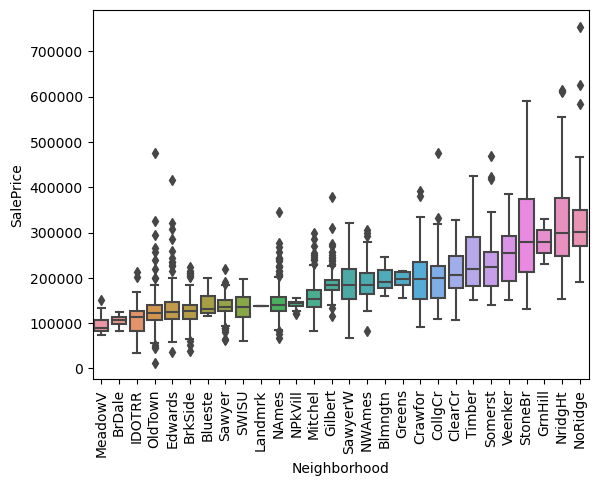

In [25]:
grouped = housing.groupby(['Neighborhood'])
order = grouped.median()['SalePrice'].sort_values().index
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing, order = order)
plt.tick_params(axis='x', labelrotation=90)

In [31]:
housing.groupby(['MSSubClass']).mean()['SalePrice']

/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_20765/2109797714.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  housing.groupby(['MSSubClass']).mean()['SalePrice']


MSSubClass
20     184049.246006
30      98054.991870
40     144916.666667
45     111711.764706
50     140907.660232
60     232109.866534
70     154971.586207
75     202880.952381
80     169159.036697
85     152288.372093
90     141175.494253
120    203051.497041
150    148400.000000
160    137451.250000
180    106560.000000
190    125757.075472
Name: SalePrice, dtype: float64

In [34]:
housing.groupby(['MSZoning'])['SalePrice'].agg(['mean', 'median'])

,mean,median
MSZoning,,
A (agr),81500.000000,81500.0
C (all),80700.647059,78000.0
FV,216343.053097,208300.0
I (all),80312.500000,80312.5
RH,131639.714286,140000.0
RL,187973.443227,170000.0
RM,127076.361244,122550.0


In [39]:
housing['Condition1'].value_counts()

Norm      2228
Feedr      137
Artery      81
RRAn        40
PosN        37
RRAe        26
PosA        19
RRNn         8
RRNe         4
Name: Condition1, dtype: int64

In [35]:
housing.groupby(['Condition1'])['SalePrice'].agg(['mean', 'median'])

,mean,median
Condition1,,
Artery,129891.975309,120000.0
Feedr,141343.802920,138500.0
Norm,180962.391382,162950.0
PosA,246650.000000,192000.0
PosN,237920.459459,207000.0
RRAe,138650.000000,140250.0
RRAn,177734.050000,167832.5
RRNe,150337.500000,156500.0
RRNn,189906.250000,184000.0


/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_20765/3803418357.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = grouped.median()['SalePrice'].sort_values().index


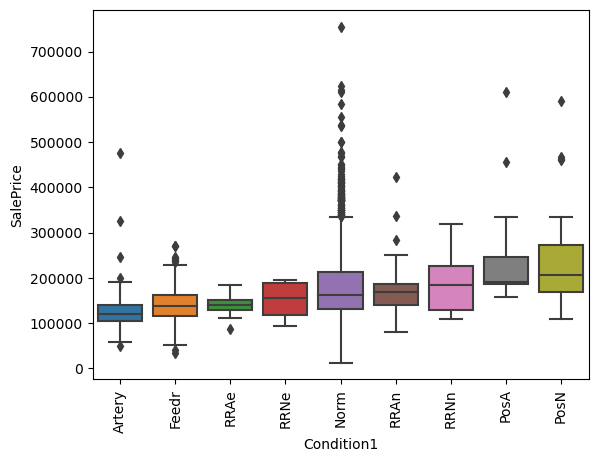

In [36]:
grouped = housing.groupby(['Condition1'])
order = grouped.median()['SalePrice'].sort_values().index
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = housing, order = order)
plt.tick_params(axis='x', labelrotation=90)

In [38]:
housing['Condition2'].value_counts()

Norm      2555
Feedr       12
PosN         3
Artery       3
PosA         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [43]:
# 83% are 1-family homes
housing['BldgType'].value_counts(normalize = True)

1Fam      0.829070
TwnhsE    0.078295
Twnhs     0.037984
Duplex    0.033721
2fmCon    0.020930
Name: BldgType, dtype: float64

/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_20765/3181838049.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = grouped.median()['SalePrice'].sort_values().index


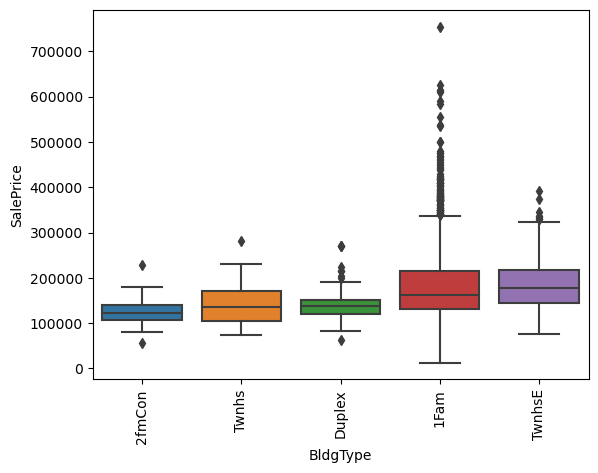

In [42]:
grouped = housing.groupby(['BldgType'])
order = grouped.median()['SalePrice'].sort_values().index
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing, order = order)
plt.tick_params(axis='x', labelrotation=90)

In [44]:
# 83% are 1-family homes
housing['HouseStyle'].value_counts(normalize = True)

1Story    0.499225
2Story    0.299612
1.5Fin    0.110078
SLvl      0.045736
SFoyer    0.027132
2.5Unf    0.008527
1.5Unf    0.007364
2.5Fin    0.002326
Name: HouseStyle, dtype: float64

/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_20765/2835475552.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = grouped.median()['SalePrice'].sort_values().index


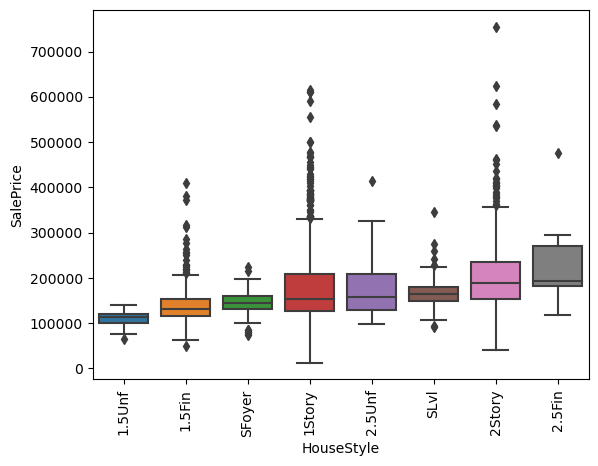

In [45]:
# median price goes up with number of finished stories
grouped = housing.groupby(['HouseStyle'])
order = grouped.median()['SalePrice'].sort_values().index
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = housing, order = order)
plt.tick_params(axis='x', labelrotation=90)

/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_20765/813279824.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = grouped.median()['SalePrice'].sort_values().index


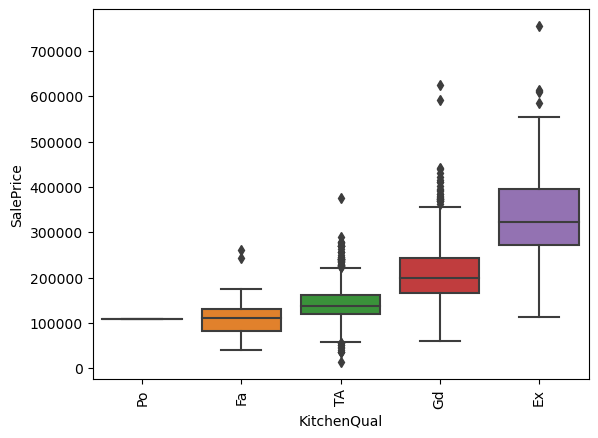

In [46]:
# median price goes up with number of finished stories
grouped = housing.groupby(['KitchenQual'])
order = grouped.median()['SalePrice'].sort_values().index
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = housing, order = order)
plt.tick_params(axis='x', labelrotation=90)

In [47]:
housing['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

In [48]:
housing['SaleType'].value_counts()

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

In [49]:
housing['SaleCondition'].value_counts()

Normal     2414
Partial      82
Abnorml      61
Family       17
Alloca        4
AdjLand       2
Name: SaleCondition, dtype: int64

In [ ]:
# move this to LINEAR MODELING

In [10]:
# find variables with low variation (highly imbalanced distributions)
for col in features.columns:
    value_counts = features[col].value_counts(normalize=True)
    highest_freq = value_counts.max()
    if highest_freq > 0.95:
        print(f"Column {col} has highest frequency of {highest_freq:.2%}")

Column LowQualFinSF has highest frequency of 98.72%
Column KitchenAbvGr has highest frequency of 95.85%
Column 3SsnPorch has highest frequency of 98.84%
Column PoolArea has highest frequency of 99.65%
Column MiscVal has highest frequency of 96.32%
Column Street has highest frequency of 99.61%
Column Utilities has highest frequency of 99.92%
Column LandSlope has highest frequency of 95.27%
Column Condition2 has highest frequency of 99.03%
Column RoofMatl has highest frequency of 98.60%
Column Heating has highest frequency of 98.45%
Column PoolQC has highest frequency of 99.65%
Column MiscFeature has highest frequency of 96.24%


In [15]:
high_freq_vars = ['LowQualFinSF', 
                  'KitchenAbvGr',
                  '3SsnPorch',
                  'PoolArea',
                  'MiscVal',
                  'Street',
                  'Utilities',
                  'LandSlope',
                  'Condition2',
                  'RoofMatl',
                  'Heating',
                  'PoolQC',
                  'MiscFeature'
                ]

In [16]:
features[high_freq_vars].dtypes

LowQualFinSF     int64
KitchenAbvGr     int64
3SsnPorch        int64
PoolArea         int64
MiscVal          int64
Street          object
Utilities       object
LandSlope       object
Condition2      object
RoofMatl        object
Heating         object
PoolQC          object
MiscFeature     object
dtype: object

In [17]:
# define the independent and dependent variables
X = features[high_freq_vars]
y = price

# create dummy variables for categorical columns
X = pd.get_dummies(X)

# add a constant to the independent variables
X = sm.add_constant(X)

# fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     7.098
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           3.92e-32
Time:                        13:55:02   Log-Likelihood:                -32502.
No. Observations:                2580   AIC:                         6.508e+04
Df Residuals:                    2544   BIC:                         6.529e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8.521e+04   4.18e+0

In [18]:
# features with significant relationship with sale price (p-value < 0.05):
# LowQualFinSF, KitchenAbvGr, Sreet, Utilities, LandSlope, Condition2, RoofMatl, Heating, PoolQC

# features to drop:
# 3SsnPorch, PoolArea, MiscVal, MiscFeature

features.drop(['3SsnPorch', 'PoolArea', 'MiscVal', 'MiscFeature'], axis=1, inplace = True)

In [20]:
features.shape

(2580, 75)

In [22]:
# check if there are any categorical features with too many unique values
# none are above 20 except neighborhood, so remove none
features.select_dtypes(include=['object']).nunique()

MSZoning          7
Street            2
Alley             3
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     28
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          6
BsmtCond          6
BsmtExposure      5
BsmtFinType1      7
BsmtFinType2      7
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       5
Functional        7
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
PavedDrive        3
PoolQC            5
Fence             5
SaleType         10
SaleCondition     6
dtype: int64